<a href="https://colab.research.google.com/github/changsin/ML/blob/main/MIU/04.linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear regression
Linear regression is a parametric method that follows a linear model: i.e., there is a linear relationship between variables.

## Model
The equation of the linear model is:

$$ h_\theta(x) = \theta_0 + \theta_1x $$

- h: hypothesis
- $\theta_0, \theta_1 $: parameters
- x: input


## Cost function
Following Andrew Ng's [Coursera Machine Learning](https://www.coursera.org/learn/machine-learning), here is the cost function we use a slightly modified MSE (Mean Squared Error) to compute the error:

$$ J(\theta) = \frac{1}{2m}\sum\limits_{t=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})^2 $$

- $J(\theta)$: Cost function
- m: number  of samples
- h: hypothesis
- y: ground truth

### Two things to note are:
1. Note that the superscript i in ($x^{(i)}, y^{(i)}$) does not mean an exponential term , but an index.
2. The denominator m is multiplied by 2 to make further calculations (i.e., taking derivatives) easy. It does not affect the result in computing the errors.



## Gradient Descent
The goal of linear regression is to find the parameters $\theta_0$ and $ \theta_1$ that minimize the error.
That amounts to taking partial derivatives of the quadratic error function in terms of the two parameter terms $\theta_0$ and $ \theta_1$. You can see why by plotting the error function. The convex shape tells us that there is a global minimum at the lowest point and partial derivatives would help us calculate how much we need to adjust the parameters on each iteration. 


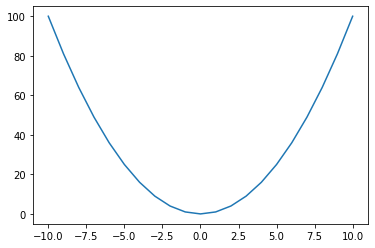

In [61]:
import numpy as np
import matplotlib.pyplot as plt

X = np.arange(-10, 11, 1)
Y = X**2
Y
plt.plot(X, Y)

### Derivation of partial derivatives
Taking partial derivatives on the cost function J:
$$
J(\theta) = \frac{1}{2m}\sum\limits_{t=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})^2 
$$

means:

$$
\frac{\delta}{\delta\theta_j} J(\theta_0, \theta_1) = \frac{\delta}{\delta\theta_j}[ \frac{1}{2m}\sum\limits_{t=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})^2 ]
$$

Since $h_\theta = \theta_0 + \theta_1x $, we can substitute h:

$$
 = \frac{\delta}{\delta\theta_j}[ \frac{1}{2m}\sum\limits_{t=1}^{m}(\theta_0 + \theta_1x^{(i)} - y^{(i)})^2 ]
$$

To take a partial derivative, you need to expand the term.

$$
 (\theta_0 + \theta_1x^{(i)} - y^{(i)})^2 = \theta_0^2 + (\theta_1x^{(i)})^2 + (y^{(i)})^2 + 2\theta_0 \theta_1x^{(i)} - 2\theta_0 y^{(i)} - 2\theta_1x^{(i)} y^{(i)}
$$

Taking partial derivatives for $ \theta_0 $ and $\theta_1$, gives us:


$$
\frac{\delta}{\delta\theta_0}[ 
\theta_0^2 + (\theta_1x^{(i)})^2 + (y^{(i)})^2 + 2\theta_0 \theta_1x^{(i)} - 2\theta_0 y^{(i)} - 2\theta_1x^{(i)} y^{(i)}]
$$

$$
= 2\theta_0 + 2\theta_1x^{(i)} - 2y^{(i)}
$$
$$
= 2(\theta_0 + \theta_1x^{(i)} - y^{(i)}) = 2(h_\theta x^{(i)} - y^{(i)})
$$
In other words,
$$ \frac{\delta}{\delta\theta_0} J(\theta) = \frac{1}{m}\sum\limits_{i=1}^{m}(h_\theta x^{(i)} - y^{(i)})
$$


Similarly, for $ \theta_1$:
$$
\frac{\delta}{\delta\theta_1}[ 
\theta_0^2 + (\theta_1x^{(i)})^2 + (y^{(i)})^2 + 2\theta_0 \theta_1x^{(i)} - 2\theta_0 y^{(i)} - 2\theta_1x^{(i)} y^{(i)}]
$$

$$
= 2\theta_1x^{(i)} + 2\theta_0x^{(i)} - 2x^{(i)}y^{(i)}
$$

$$
= 2(\theta_0 + \theta_1x^{(i)} - y^{(i)})x^{(i)} = 2(h_\theta(x^{(i)}) - y^{(i)})x^{(i)}
$$

In other words,

$$ \frac{\delta}{\delta\theta_1} J(\theta) = \frac{1}{m}\sum\limits_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})x^{(i)} $$


In summary,

$$ \frac{\delta}{\delta\theta_0} J(\theta_0, \theta_1) = \frac{1}{m}\sum\limits_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)}) $$

$$ \frac{\delta}{\delta\theta_1} J(\theta_0, \theta_1) = \frac{1}{m}\sum\limits_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})x^{(i)} $$

In practice, we add a learning rate $\alpha$ and update all $\theta s$ simultaneously. 

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update } \theta_j \text{ for all } j$$

So this is the formula we will use to update the parameters.

In [ ]:
!git clone https://github.com/changsin/ML

Cloning into 'ML'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 50 (delta 11), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (50/50), done.


# Sample dataset:
 [sklearn diabetes](https://scikit-learn.org/stable/datasets/toy_dataset.html)

## X column attributes:
1. age age in years
2. sex
3. bmi body mass index
4. bp average blood pressure
5. s1 tc, total serum cholesterol
6. s2 ldl, low-density lipoproteins
7. s3 hdl, high-density lipoproteins
8. s4 tch, total cholesterol / HDL
9. s5 ltg, possibly log of serum triglycerides level
10. s6 glu, blood sugar level

(mean centered and scaled by the standard deviation times n_samples (i.e. the sum of squares of each column totals 1).

## y target value:
 quantitative measure of disease progression one year after baseline


In [1]:
from sklearn import datasets

X, y = datasets.load_diabetes(return_X_y=True)
X.shape

(442, 10)

No handles with labels found to put in legend.


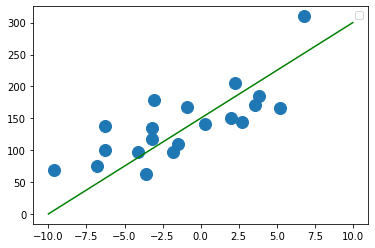

In [60]:
import matplotlib.pyplot as plt

def plot_data(X, y, limit=20):
  fig, ax = plt.subplots()
  ax.plot(X[:limit, 8]*100, y[:limit], marker='o', linestyle='', ms=12)
  # ax.plot(negatives[:, 0], negatives[:, 1], marker='o', linestyle='', ms=12, label='-')

  plt.legend()

  return ax

ax = plot_data(X, y)

x_line = np.linspace(-10, 10, 100)
y_line = 15*x_line + 150

ax.plot(x_line, y_line, 'g', label='y=wx+b')